In [1]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib import rcParams
from scipy import io
import os
from sklearn import linear_model


rcParams.update({'font.size': 18})
plt.rcParams['figure.figsize'] = [12, 12]

In [2]:
# Define the absolute path
absolute_path = r"C:\Users\thana\OneDrive\Desktop\Imageprocessing\DATA"

# dogs vs. cats
dogdata_w_mat = io.loadmat(os.path.join(absolute_path,'dogData_w.mat'))
catdata_w_mat = io.loadmat(os.path.join(absolute_path,'catData_w.mat'))

dog_wave = dogdata_w_mat['dog_wave']
cat_wave = catdata_w_mat['cat_wave']

CD = np.concatenate((dog_wave,cat_wave),axis=1)

train = np.concatenate((dog_wave[:,:60],cat_wave[:,:60]),axis=1)
test = np.concatenate((dog_wave[:,60:80],cat_wave[:,60:80]),axis=1)
label = np.repeat(np.array([1,-1]),60)

A = label @ np.linalg.pinv(train)
test_labels = np.sign(A@test)

In [3]:
lasso = linear_model.Lasso().fit(train.T,label)
A_lasso = lasso.coef_
test_labels_lasso = np.sign(A_lasso@test)

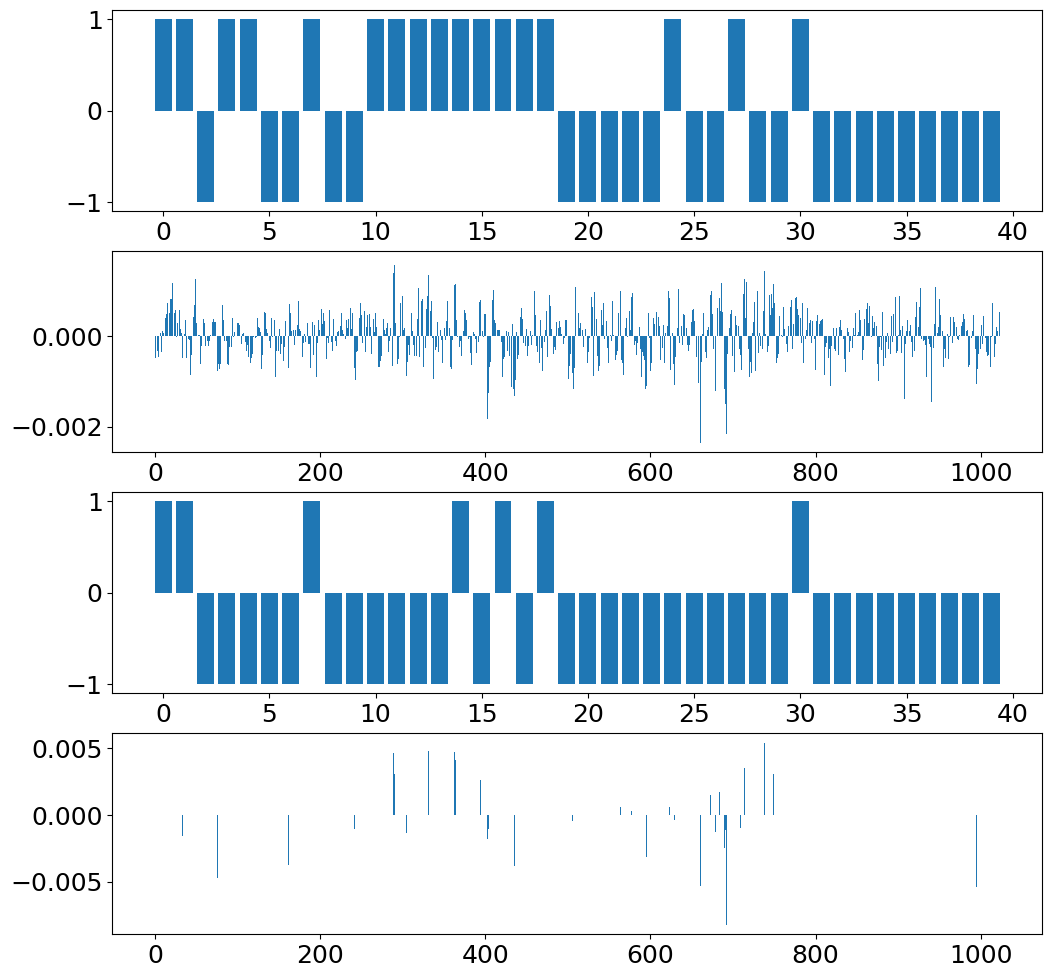

In [4]:
fig,axs = plt.subplots(4,1)
axs[0].bar(range(len(test_labels)),test_labels)
axs[1].bar(range(len(A)),A)
axs[2].bar(range(len(test_labels_lasso)),test_labels_lasso)
axs[3].bar(range(len(A_lasso)),A_lasso)


plt.show()

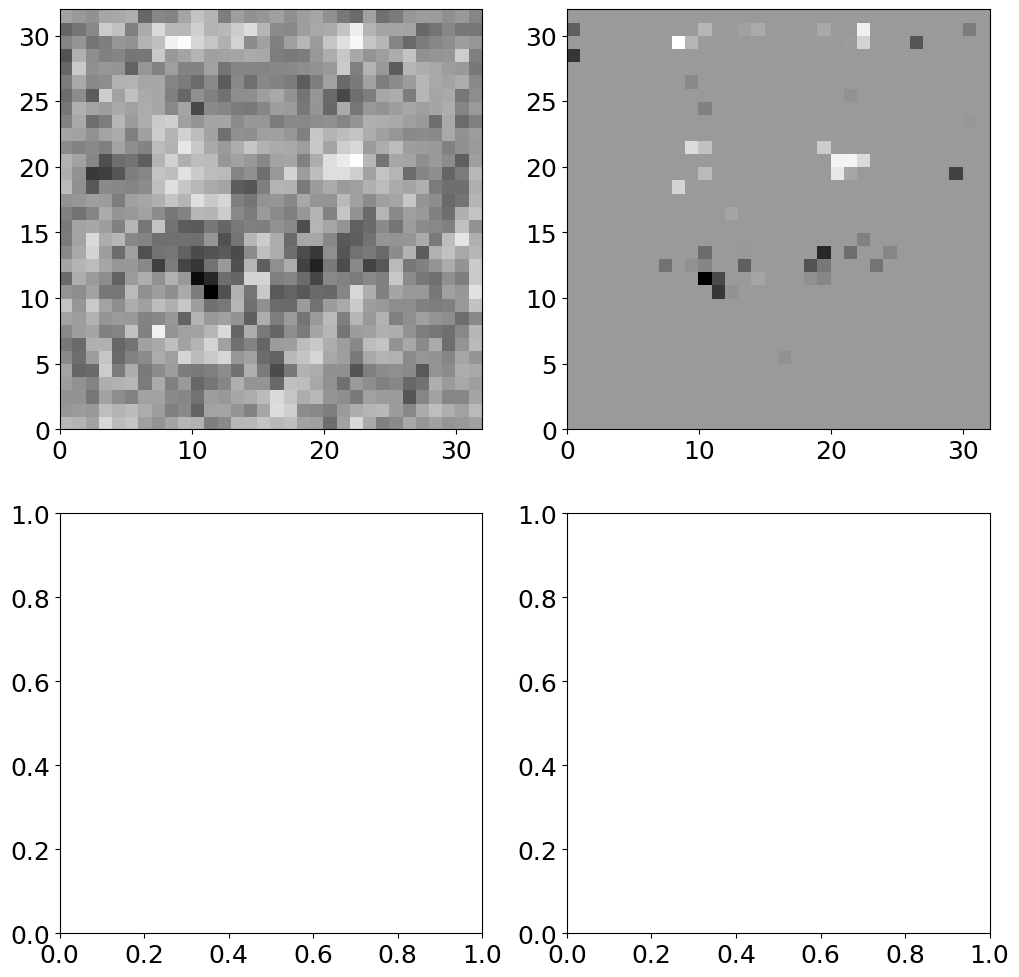

In [5]:
fig,axs = plt.subplots(2,2)
axs = axs.reshape(-1)
A2 = np.flipud(np.reshape(A,(32,32)))
A2_lasso = np.flipud(np.reshape(A_lasso,(32,32)))
axs[0].pcolor(np.rot90(A2),cmap='gray')
axs[1].pcolor(np.rot90(A2_lasso),cmap='gray')


plt.show()